In [1]:
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx

import geomstats.backend as gs
from geomstats.geometry.poincare_ball import PoincareBall
from geomstats.geometry.hyperbolic import Hyperbolic

INFO: Using numpy backend


In [168]:
def sample_points(manifold, n, scale=1):
    points = manifold.random_uniform(n, scale)
    return points

In [215]:
def get_ave_ecc_curve(manifold, points):
    n = len(points)
    points_dist = manifold.metric.dist_pairwise(points)
    
    dist_edges = {}
    for i in range(n):
        for j in range(n):
            d = points_dist[i][j]
            if d == 0: continue
            if d in dist_edges:
                dist_edges[d].append((i, j))
            else:
                dist_edges[d] = [(i, j)]
    
    graphs = []
    g = nx.Graph()
    for i in range(n):
        g.add_node(i)
    
    for d in sorted(dist_edges):
        g = g.copy()
        for e in dist_edges[d]:
            g.add_edge(*e)
        graphs.append(g.copy())
    
    ave_eccs = []
    bounding_indices = []
    for i in range(len(graphs)):
        if nx.is_connected(graphs[i]):
            eccs = sorted([nx.eccentricity(graphs[i], j) for j in range(N)], reverse=True)
            ave_ecc = sum(eccs) / N
            ave_eccs.append(ave_ecc)
            
            bi = np.where(np.array(eccs) >= ave_ecc)[0][-1]
            bounding_indices.append(bi)
        else:
            #print(i, "not connected")
            pass
    return ave_eccs, bounding_indices

In [237]:
def gen_ave_eccs(m, n, k):
    scale = 1/np.sqrt(-k)
    pb_manifold = PoincareBall(dim=2, scale=scale)
    
    ave_eccs_list = []
    #bounding_indices_list = []
    for i in range(M):
        points = sample_points(pb_manifold, n=N)
        #ave_eccs, bounding_indices = get_ave_ecc_curve(pb_manifold, points)
        ave_eccs, _ = get_ave_ecc_curve(pb_manifold, points)
        ave_eccs_list.append(ave_eccs)
        #bounding_indices_list.append(bounding_indices)
    return ave_eccs_list

In [233]:
M = 20
N = 20
K = -100

In [252]:
%%time
ave_eccs_a = gen_ave_eccs(40, 20, -1000)

CPU times: user 5.8 s, sys: 0 ns, total: 5.8 s
Wall time: 5.76 s


In [253]:
%%time
ave_eccs_b = gen_ave_eccs(40, 20, -1/1000)

CPU times: user 5.91 s, sys: 0 ns, total: 5.91 s
Wall time: 5.82 s


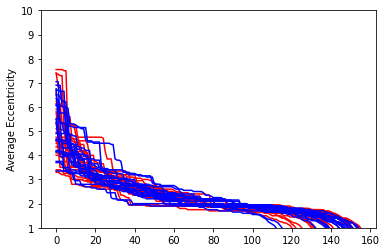

In [254]:
for ecc in ave_eccs_a:
    plt.plot(ecc, color='red')
for ecc in ave_eccs_b:
    plt.plot(ecc, color='blue')
plt.title("")
plt.ylim(1, 10)
plt.ylabel("Average Eccentricity")
plt.show()

(array([2., 2., 2., 4., 2., 1., 3., 1., 0., 3.]),
 array([3.3  , 3.725, 4.15 , 4.575, 5.   , 5.425, 5.85 , 6.275, 6.7  ,
        7.125, 7.55 ]),
 <BarContainer object of 10 artists>)

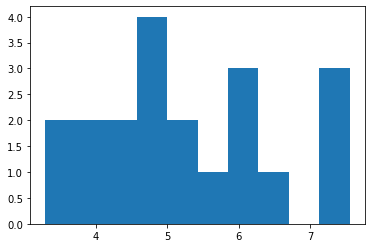

In [255]:
plt.hist([l[0] for l in ave_eccs_a])

(array([2., 1., 3., 2., 1., 3., 0., 2., 2., 4.]),
 array([3.35, 3.72, 4.09, 4.46, 4.83, 5.2 , 5.57, 5.94, 6.31, 6.68, 7.05]),
 <BarContainer object of 10 artists>)

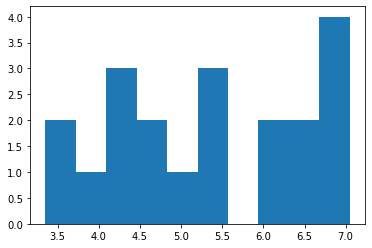

In [256]:
plt.hist([l[0] for l in ave_eccs_b])